<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [1]:
# Update the package lists for upgrades and new package installations
!apt-get update

# Install the Chromium WebDriver, which is needed by Selenium for controlling the Chromium browser
!apt install chromium-chromedriver

# Copy the installed Chromium WebDriver to a standard directory for easier access
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

# Install the Selenium package, which is used for automating web browser interaction
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,473 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/univer

In [32]:
import requests
from bs4 import BeautifulSoup
from nltk import ngrams, word_tokenize, pos_tag, download
from collections import Counter
import pandas as pd

# Download NLTK resources
download('punkt')
download('averaged_perceptron_tagger')

def fetch_reviews_from_url(url):
    """
    Fetches movie reviews from IMDb URL.

    Parameters:
    - url (str): IMDb URL for movie reviews.

    Returns:
    - list: List of fetched movie reviews.
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    reviews_data = []
    review_elements = soup.find_all('div', class_='text show-more__control')
    for review_element in review_elements:
        review_text = review_element.get_text(strip=True)
        reviews_data.append(review_text)

    return reviews_data

def generate_ngrams(text, n):
    """
    Generates n-grams from a given text.

    Parameters:
    - text (str): Input text.
    - n (int): Size of n-grams.

    Returns:
    - list: List of generated n-grams.
    """
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(gram) for gram in n_grams]

def calculate_ngram_counts(dataset, n):
    """
    Calculates the counts of n-grams in a dataset.

    Parameters:
    - dataset (list): List of texts.
    - n (int): Size of n-grams.

    Returns:
    - Counter: Counts of n-grams.
    """
    ngram_counts = Counter()

    for review in dataset:
        ngrams_list = generate_ngrams(review, n)
        ngram_counts.update(ngrams_list)

    return ngram_counts

def compute_bigram_probabilities(dataset):
    """
    Computes bigram probabilities in a dataset.

    Parameters:
    - dataset (list): List of texts.

    Returns:
    - dict: Bigram probabilities.
    """
    bigram_counts = Counter()
    unigram_counts = Counter()

    for review in dataset:
        tokens = word_tokenize(review)
        bigrams = list(ngrams(tokens, 2))
        unigrams = list(ngrams(tokens, 1))

        bigram_counts.update(bigrams)
        unigram_counts.update(unigrams)

    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        unigram = bigram[0]

        if unigram_counts[unigram] != 0:
            probability = count / unigram_counts[unigram]
        else:
            probability = 0

        bigram_probabilities[bigram] = probability

    return bigram_probabilities

def compute_relative_probabilities(dataset):
    """
    Computes relative probabilities of noun phrases in a dataset.

    Parameters:
    - dataset (list): List of texts.

    Returns:
    - dict: Relative probabilities of noun phrases.
    """
    noun_phrase_counts = Counter()

    for review in dataset:
        tokens = word_tokenize(review)
        tagged_tokens = pos_tag(tokens)

        noun_phrases = [word for word, pos in tagged_tokens if pos.startswith('NN')]

        noun_phrase_counts.update(noun_phrases)

    max_frequency = noun_phrase_counts.most_common(1)[0][1]

    relative_probabilities = {}
    for review in dataset:
        tokens = word_tokenize(review)
        tagged_tokens = pos_tag(tokens)

        noun_phrases = [word for word, pos in tagged_tokens if pos.startswith('NN')]

        relative_probabilities[review] = {noun: freq / max_frequency for noun, freq in noun_phrase_counts.items()}

    return relative_probabilities

def display_analysis_results(ngram_counts, bigram_probabilities, relative_probabilities):
    """
    Displays analysis results including n-gram counts, bigram probabilities, and relative probabilities of noun phrases.

    Parameters:
    - ngram_counts (Counter): Counts of n-grams.
    - bigram_probabilities (dict): Bigram probabilities.
    - relative_probabilities (dict): Relative probabilities of noun phrases.
    """
    print("N-gram Counts:")
    print(ngram_counts)

    print("\nBigram Probabilities:")
    print(bigram_probabilities)

    print("\nRelative Probabilities of Noun Phrases:")
    df = pd.DataFrame.from_dict(relative_probabilities, orient='index')
    print(df)

if __name__ == "__main__":
    target_url = "https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv"
    reviews_data = fetch_reviews_from_url(target_url)

    n_value = 3
    ngram_counts = calculate_ngram_counts(reviews_data, n_value)
    bigram_probabilities = compute_bigram_probabilities(reviews_data)
    relative_probabilities = compute_relative_probabilities(reviews_data)

    display_analysis_results(ngram_counts, bigram_probabilities, relative_probabilities)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


N-gram Counts:
Counter({". It 's": 7, "it 's a": 6, ", it 's": 6, ', but I': 6, '. This is': 5, 'this movie ,': 5, 'of the movie': 4, 'a movie about': 4, ', but it': 4, 'King of Comedy': 4, 'a movie that': 4, '. This film': 4, '. It was': 3, "it 's not": 3, 'is far from': 3, 'far from a': 3, 'this movie .': 3, '. There are': 3, 'this movie was': 3, 'is a movie': 3, ', this movie': 3, 'of the year': 3, 'The Dark Knight': 3, "'s not a": 3, 'trying to say': 3, "I do n't": 3, 'This film is': 3, 'of this movie': 3, ', and I': 3, 'the way he': 3, 'this movie is': 3, '. However ,': 3, 'that the movie': 2, 'the movie was': 2, 'at the end': 2, "did n't have": 2, 'the movie ,': 2, 'movie , and': 2, 'could have been': 2, '. But as': 2, 'But as a': 2, 'the Joker ,': 2, "'s not really": 2, ', you wo': 2, "you wo n't": 2, "if it 's": 2, ', Cinematography ,': 2, "but it 's": 2, '. The way': 2, "and that 's": 2, 'I have seen': 2, 'film is far': 2, "It 's a": 2, 'take on the': 2, 'on the Joker': 2, 'To

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [33]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# IMDb URL for the film's reviews
imdb_reviews_url = "https://www.imdb.com/title/tt10640346/reviews?ref_=tt_urv"

def fetch_imdb_reviews(url, max_reviews=10000):
    """
    Scrapes IMDb reviews for a given URL up to a specified maximum number of reviews.

    Parameters:
    - url (str): IMDb URL for the film's reviews.
    - max_reviews (int): Maximum number of reviews to scrape.

    Returns:
    - reviews (list): List of scraped reviews.
    """
    reviews = []
    page = 1

    while len(reviews) < max_reviews:
        response = requests.get(url, params={"start": (page - 1) * 25})
        if response.status_code != 200:
            print(f"Failed to retrieve page {page}. Check your internet connection or the URL.")
            break

        soup = BeautifulSoup(response.content, "html.parser")
        review_elements = soup.find_all("div", class_="text")

        if not review_elements:
            print("No more reviews found.")
            break

        for review_element in review_elements:
            review_text = review_element.get_text(strip=True)
            reviews.append(review_text)

            if len(reviews) >= max_reviews:
                break

        page += 1

    return reviews

# Fetch reviews from IMDb
movie_reviews = fetch_imdb_reviews(imdb_reviews_url)

# Design a query
search_query = "I can see why the reviews are polarized"

# Combine documents and query
all_texts = movie_reviews + [search_query]

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()

# Rank the documents based on cosine similarity
document_ranking = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)

# Display results
print("Search Query: ", search_query)
print("\nRanking of Documents:")
for rank, (doc_index, similarity) in enumerate(document_ranking, start=1):
    print(f"Rank {rank}: Document {doc_index + 1} - Similarity: {similarity:.4f}")


Streaming output truncated to the last 5000 lines.
Rank 5001: Document 5001 - Similarity: 0.0649
Rank 5002: Document 5026 - Similarity: 0.0649
Rank 5003: Document 5051 - Similarity: 0.0649
Rank 5004: Document 5076 - Similarity: 0.0649
Rank 5005: Document 5101 - Similarity: 0.0649
Rank 5006: Document 5126 - Similarity: 0.0649
Rank 5007: Document 5151 - Similarity: 0.0649
Rank 5008: Document 5176 - Similarity: 0.0649
Rank 5009: Document 5201 - Similarity: 0.0649
Rank 5010: Document 5226 - Similarity: 0.0649
Rank 5011: Document 5251 - Similarity: 0.0649
Rank 5012: Document 5276 - Similarity: 0.0649
Rank 5013: Document 5301 - Similarity: 0.0649
Rank 5014: Document 5326 - Similarity: 0.0649
Rank 5015: Document 5351 - Similarity: 0.0649
Rank 5016: Document 5376 - Similarity: 0.0649
Rank 5017: Document 5401 - Similarity: 0.0649
Rank 5018: Document 5426 - Similarity: 0.0649
Rank 5019: Document 5451 - Similarity: 0.0649
Rank 5020: Document 5476 - Similarity: 0.0649
Rank 5021: Document 5501 - Si

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

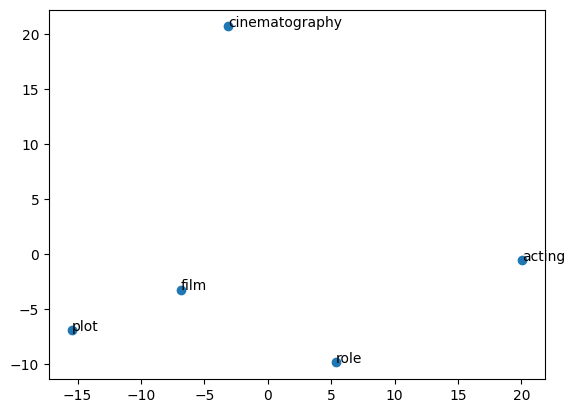

In [35]:
# Write your code here
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
import requests
from bs4 import BeautifulSoup

# IMDb URL for movie reviews
imdb_reviews_url = "https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv"

def fetch_reviews_from_imdb(url, max_reviews=10000):
    """
    Scrapes IMDb reviews for a given URL up to a specified maximum number of reviews.

    Parameters:
    - url (str): IMDb URL for the movie's reviews.
    - max_reviews (int): Maximum number of reviews to scrape.

    Returns:
    - fetched_reviews (list): List of scraped reviews.
    """
    fetched_reviews = []
    page = 1

    while len(fetched_reviews) < max_reviews:
        response = requests.get(url, params={"start": (page - 1) * 25})
        if response.status_code != 200:
            print(f"Failed to retrieve page {page}. Check your internet connection or the URL.")
            break

        soup = BeautifulSoup(response.content, "html.parser")
        review_elements = soup.find_all("div", class_="text")

        if not review_elements:
            print("No more reviews found.")
            break

        for review_element in review_elements:
            review_text = review_element.get_text(strip=True)
            fetched_reviews.append(review_text)

            if len(fetched_reviews) >= max_reviews:
                break

        page += 1

    return fetched_reviews

# Fetch reviews from IMDb
movie_reviews = fetch_reviews_from_imdb(imdb_reviews_url)

# Preprocess the data (tokenization and cleaning)
def preprocess_review(review_text):
    """
    Preprocesses a movie review by removing non-alphanumeric characters and converting to lowercase.

    Parameters:
    - review_text (str): Raw text of a movie review.

    Returns:
    - words (list): List of preprocessed words.
    """
    words = re.findall(r'\b\w+\b', review_text.lower())
    return words

tokenized_reviews = [preprocess_review(review) for review in movie_reviews]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)
word2vec_model.save("word2vec_model_movie_reviews.bin")

# Visualize Word Embeddings using PCA
def plot_word_embeddings_pca(model, words):
    """
    Plots the Word Embeddings using PCA for a subset of words.

    Parameters:
    - model (Word2Vec): Trained Word2Vec model.
    - words (list): List of words to visualize.
    """
    word_vectors = model.wv[words]
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

# Visualize a subset of words (replace with words from your dataset)
words_for_visualization = ["film", "role", "acting", "plot", "cinematography"]
plot_word_embeddings_pca(word2vec_model, words_for_visualization)


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file

https://github.com/SujitGiridharan/INFO5731/blob/main/reviews_3.csv

# Link:



